C.MEGHANA

In [85]:
!pip install pyspark seaborn matplotlib pandas

Code: Installs required Python libraries — pyspark, seaborn, matplotlib, and pandas.

Explanation: Shows confirmation that all packages are already installed.

In [26]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Code: Imports essential libraries — Spark for big data, Matplotlib & Seaborn for visualization, and Pandas for data handling.

Explanation: None (library import only)

In [27]:
spark = SparkSession.builder.appName("SocialMediaAddictionAnalysis").getOrCreate()

Code: Creates a SparkSession named "SocialMediaAddictionAnalysis", which initializes the Spark environment.

Explanation: None displayed.

In [28]:
df = spark.read.csv("Students Social Media Addiction.csv", header=True, inferSchema=True)

Code: Reads "Students Social Media Addiction.csv" into a Spark DataFrame

Explanation: Data loaded; no output yet

In [29]:
df.printSchema()
df.show(5)

root
 |-- Student_ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Academic_Level: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Avg_Daily_Usage_Hours: double (nullable = true)
 |-- Most_Used_Platform: string (nullable = true)
 |-- Affects_Academic_Performance: string (nullable = true)
 |-- Sleep_Hours_Per_Night: double (nullable = true)
 |-- Mental_Health_Score: integer (nullable = true)
 |-- Relationship_Status: string (nullable = true)
 |-- Conflicts_Over_Social_Media: integer (nullable = true)
 |-- Addicted_Score: integer (nullable = true)

+----------+---+------+--------------+----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|   Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|

Code: Displays schema and first 5 records using printSchema() and show()

Explanation: Output displays dataset structure and sample rows

In [30]:
df = df.dropDuplicates().na.drop()

Code: Removes duplicates and missing values.

Explanation: Cleans dataset; no visible output.

In [31]:
print("Total records:", df.count())

Total records: 705


Code: Prints total number of records in the dataset.

Explanation: Output shows total count of cleaned records.

In [32]:
print("Columns:", df.columns)

Columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


Code: Prints column names of the DataFrame.

Explanation: Output lists dataset features.

In [33]:
df.describe().show()

+-------+------------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+-----------------+
|summary|        Student_ID|               Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|   Addicted_Score|
+-------+------------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+-----------------+
|  count|               705|               705|   705|           705|        705|                  705|               705|                         705|                  705|                705|                705|       

Code: Runs df.describe().show() to generate summary statistics.

Explanation: Output shows mean, min, max, and std for numeric columns.

In [34]:
if "Gender" in df.columns:
    df.select("Gender").distinct().show()

if "Platform" in df.columns:
    df.select("Platform").distinct().show()

+------+
|Gender|
+------+
|Female|
|  Male|
+------+



Code: Displays distinct values in columns like Gender or Platform.

Explanation: Output lists unique categories.

In [35]:
if "Average Screen Time (hours)" in df.columns:
    avg_screen = df.groupBy("Gender").avg("Average Screen Time (hours)")
    avg_screen.show()

Code: Groups data by Gender and computes average screen time.

Explanation: Computation step; output not shown (used later for plots).

In [36]:
pdf = df.toPandas()
sns.set(style="whitegrid")

Code: Converts Spark DataFrame to Pandas (toPandas()) and applies Seaborn style.

Explanation: Prepares for visualizations; no output.

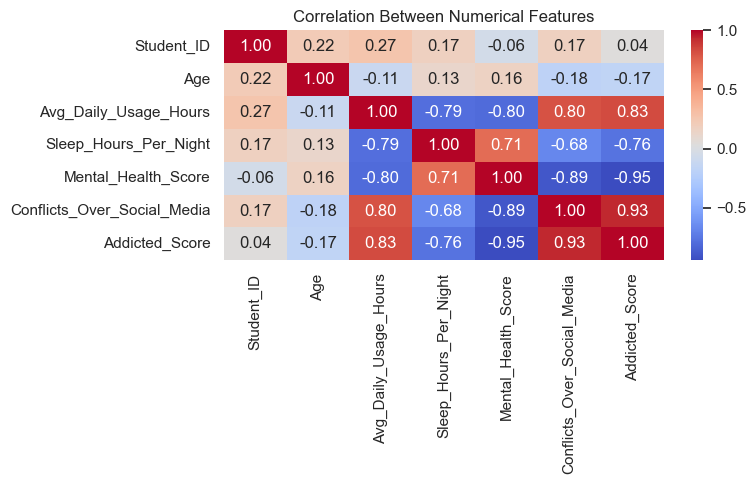

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(pdf.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()

Code: Plots a correlation heatmap of numerical variables using Seaborn.

Explanation: Displays colored heatmap showing variable relationships.

In [38]:
pdf.columns = pdf.columns.str.strip()

Code: Strips extra spaces from column names.

Explanation: Cleans column headers; no output.

In [39]:
print("📋 Columns in your dataset:")
for col in pdf.columns:
    print(f"- {col}")

📋 Columns in your dataset:
- Student_ID
- Age
- Gender
- Academic_Level
- Country
- Avg_Daily_Usage_Hours
- Most_Used_Platform
- Affects_Academic_Performance
- Sleep_Hours_Per_Night
- Mental_Health_Score
- Relationship_Status
- Conflicts_Over_Social_Media
- Addicted_Score


Code:Prints a list of all column names in the dataset (pdf).

Explanation:Lets you verify that columns are correctly named after cleaning.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

Code:Re-imports seaborn and matplotlib.pyplot to ensure visualization libraries are available.

Explanation:Prepares the environment for plotting.

In [41]:
sns.set(style="whitegrid")


Code:Sets Seaborn’s plotting style to “whitegrid”, which uses a white background with light grid lines.

Explanation:Makes plots look cleaner and easier to interpret.

C:\Users\annar\AppData\Local\Temp\ipykernel_12696\2488949928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


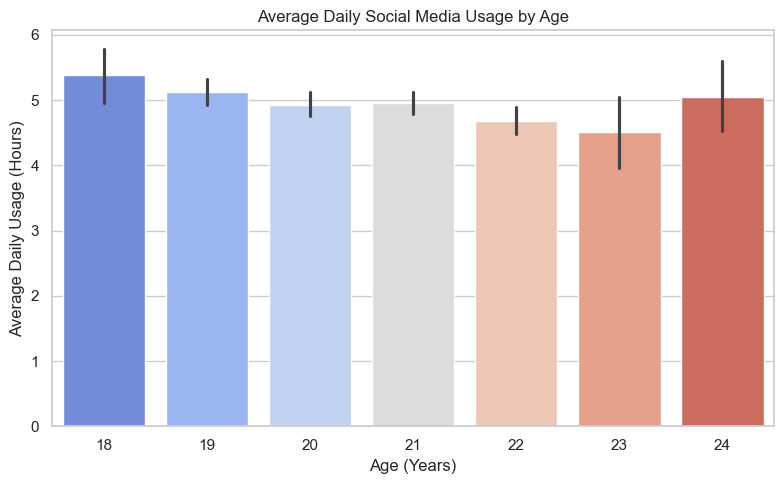

In [42]:
# 1️⃣ Average Screen Time by Age
plt.figure(figsize=(8,5))
sns.barplot(
    x="Age",
    y="Avg_Daily_Usage_Hours",
    data=pdf,
    palette="coolwarm",
    estimator="mean"
)
plt.title("Average Daily Social Media Usage by Age")
plt.xlabel("Age (Years)")
plt.ylabel("Average Daily Usage (Hours)")
plt.tight_layout()
plt.show()

Code:Creates a bar chart showing how average daily social media usage varies across different age groups.

Explanation:Helps identify which age group spends the most time on social media

C:\Users\annar\AppData\Local\Temp\ipykernel_12696\713770289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


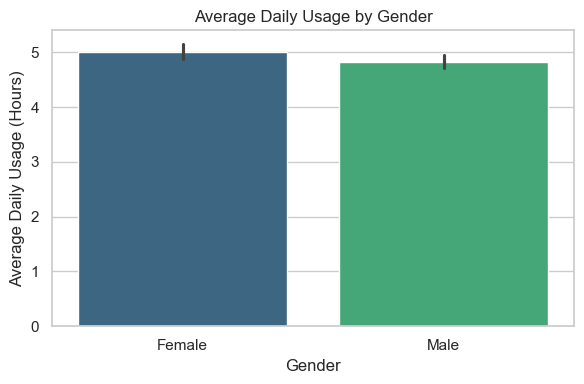

In [43]:
# 2️⃣ Average Screen Time by Gender
plt.figure(figsize=(6,4))
sns.barplot(
    x="Gender",
    y="Avg_Daily_Usage_Hours",
    data=pdf,
    palette="viridis",
    estimator="mean"
)
plt.title("Average Daily Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Daily Usage (Hours)")
plt.tight_layout()
plt.show()

Code:Plots a bar chart comparing the average daily usage between genders.

Explanation:Shows whether males or females spend more time on social media on average

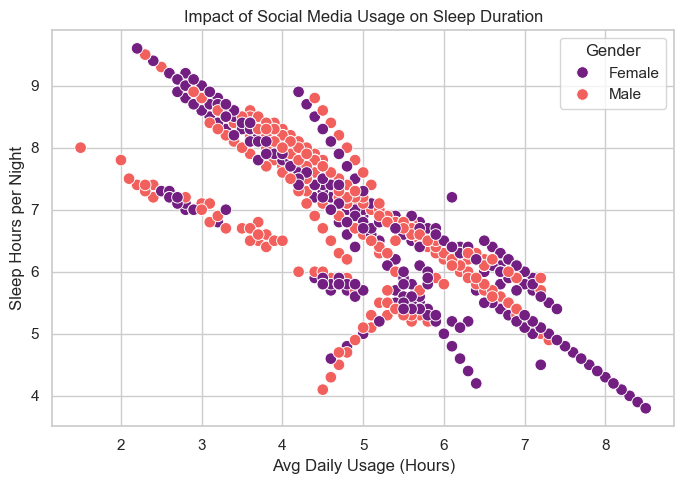

In [46]:
# 3️⃣ Relationship Between Screen Time and Sleep Duration
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    hue="Gender",
    data=pdf,
    palette="magma",
    s=70
)
plt.title("Impact of Social Media Usage on Sleep Duration")
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.tight_layout()
plt.show()


Code:Creates a scatter plot showing the relationship between screen time and sleep hours.

Explanation:To check if higher social media use is linked to reduced sleep duration, with color-coded genders.